## **Convolutional Nueral Network Model Expiriment** 

In [1]:
from google.colab import drive
drive.mount('/content/drive')


import os 
os.chdir('/content/drive/My Drive/Deep_learning_unit')
folder = os.path.join('/content/drive/My Drive/Deep_learning_unit')
!ls 

Mounted at /content/drive
Assessment_82accuracy.ipynb  Final_Experiment.ipynb  FinalModel.ipynb


In [2]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import scipy.io
import tensorflow as tf
import math
import timeit
from keras.layers.normalization import BatchNormalization

## **Loading the Data**

In [3]:
def load_cifar10(num_training=50000, num_test=10000):
    """
    Fetch the CIFAR-10 dataset from the web.
    """
    # Load the raw CIFAR-10 dataset and use appropriate data types and shapes
    cifar10 = tf.keras.datasets.cifar10.load_data()
    (X_train, y_train), (X_test, y_test) = cifar10
    X_train = np.asarray(X_train, dtype=np.float32)
    y_train = np.asarray(y_train, dtype=np.int32).flatten()
    X_test = np.asarray(X_test, dtype=np.float32)
    y_test = np.asarray(y_test, dtype=np.int32).flatten()


    # Normalize the data: subtract the mean pixel and divide by std
    mean_pixel = X_train.mean(axis=(0, 1, 2), keepdims=True)
    std_pixel = X_train.std(axis=(0, 1, 2), keepdims=True)
    X_train = (X_train - mean_pixel) / std_pixel
    X_test = (X_test - mean_pixel) / std_pixel

    return X_train, y_train, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_test, y_test = load_cifar10()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape, y_train.dtype)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

170500096/170498071 [==============================] - 4s 0us/step
Train data shape:  (50000, 32, 32, 3)
Train labels shape:  (50000,) int32
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Train: X=(50000, 32, 32, 3), y=(50000,)
Test: X=(10000, 32, 32, 3), y=(10000,)


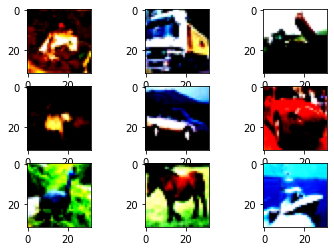

In [4]:
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i])
# show the figure
plt.show()

# **Convolutional Nueral Network Expiriments**

## Expiriment 1

### **CNN Architectures**

#### **1. Alexnet**

In [5]:

model = tf.keras.models.Sequential([
   
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3,padding="same",activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),


    tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding="same",activation="relu"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding="same",activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
   

    tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding="same",activation="relu"),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding="same",activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         7

In [6]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer ="adam",
              metrics = ["accuracy"] )

In [7]:
history = model.fit(X_train, y_train, epochs=10,batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
391/391 [==============================] - 13s 14ms/step - loss: 1.7215 - accuracy: 0.3682 - val_loss: 1.0729 - val_accuracy: 0.6160
Epoch 2/10
391/391 [==============================] - 5s 12ms/step - loss: 0.9948 - accuracy: 0.6486 - val_loss: 0.8313 - val_accuracy: 0.7079
Epoch 3/10
391/391 [==============================] - 5s 12ms/step - loss: 0.7281 - accuracy: 0.7449 - val_loss: 0.7370 - val_accuracy: 0.7492
Epoch 4/10
391/391 [==============================] - 5s 12ms/step - loss: 0.5910 - accuracy: 0.7919 - val_loss: 0.6980 - val_accuracy: 0.7628
Epoch 5/10
391/391 [==============================] - 5s 12ms/step - loss: 0.4764 - accuracy: 0.8335 - val_loss: 0.7001 - val_accuracy: 0.7728
Epoch 6/10
391/391 [==============================] - 5s 12ms/step - loss: 0.3859 - accuracy: 0.8661 - val_loss: 0.7148 - val_accuracy: 0.7714
Epoch 7/10
391/391 [==============================] - 5s 12ms/step - loss: 0.2993 - accuracy: 0.8968 - val_loss: 0.7285 - val_accuracy: 0.776

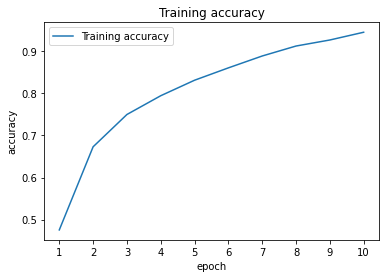

In [8]:
if int(tf.__version__.split('.')[0]) > 1:
    acc_key = 'accuracy'
else:
    acc_key = 'acc'

acc      = history.history[acc_key]
loss     = history.history['loss']
epochs   = range(1,len(acc)+1) 

plt.plot(epochs, acc,  label='Training accuracy')
plt.title('Training accuracy')
plt.xticks(epochs)
plt.xlabel('epoch')
plt.ylabel('accuracy')



plt.legend();

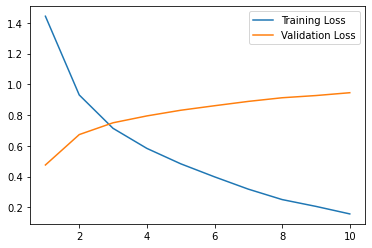

In [9]:
if int(tf.__version__.split('.')[0]) > 1:
    val_loss = 'val_loss'
else:
    acc_key = 'acc'

val_loss = history.history[acc_key]

plt.plot(epochs, loss,  label='Training Loss')
plt.plot(epochs, val_loss,  label='Validation Loss')
plt.legend()


plt.legend();


In [10]:
def plot_history(history):
    
    import pandas as pd
    import matplotlib.pyplot as plt
    import tensorflow
    

    if int(tensorflow.__version__.split('.')[0]) > 1:
        acc_key = 'accuracy'
    else:
        acc_key = 'acc'
        
    acc      = history.history[acc_key]
    val_acc  = history.history['val_' + acc_key]
    loss     = history.history['loss']
    val_loss = history.history['val_loss']
    epochs   = range(1,len(acc)+1) 
        
        
    
    plt.rcParams['font.size'] = 16
    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['axes.spines.top'] = False

    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
    
    #------------------------------------------------
    # Plot training and validation accuracy per epoch
    #------------------------------------------------
    ax1.plot(epochs, acc,  label='Training accuracy')
    ax1.plot(epochs, val_acc,  label='Validation accuracy')
    ax1.set_title('Accuracy')
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('accuracy')
    ax1.set_ylim(0.5,1)
    
    #------------------------------------------------
    # Plot training and validation loss per epoch
    #------------------------------------------------

    ax2.plot(epochs, loss,  label='Training Loss')
    ax2.plot(epochs, val_loss,  label='Validation Loss')
    ax2.set_title('Loss')
    ax2.set_xlabel('epoch')
    ax2.set_ylabel('loss')
    ax2.set_ylim(0,2)
    ax2.legend()

    fig.tight_layout()
    plt.show()

In [11]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128 , verbose=2)
print('Accuracy on test dataset:', test_accuracy)
Alex_Accuracy = int(round(test_accuracy))

79/79 - 0s - loss: 0.8563 - accuracy: 0.7783
Accuracy on test dataset: 0.7782999873161316


#### **2. VGG**

In [12]:


model = tf.keras.models.Sequential([
   

    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding="same",activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding="same",activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=256, kernel_size=3,padding="same",activation="relu"),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3,padding="same",activation="relu"),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3,padding="same",activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
   

    tf.keras.layers.Conv2D(filters=512, kernel_size=3,padding="same",activation="relu"),
    tf.keras.layers.Conv2D(filters=512, kernel_size=3,padding="same",activation="relu"),
    tf.keras.layers.Conv2D(filters=512, kernel_size=3,padding="same",activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    
    tf.keras.layers.Conv2D(filters=512, kernel_size=3,padding="same",activation="relu"),
    tf.keras.layers.Conv2D(filters=512, kernel_size=3,padding="same",activation="relu"),
    tf.keras.layers.Conv2D(filters=512, kernel_size=3,padding="same",activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")

])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 256)        

In [13]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer ="adam",
              metrics = ["accuracy"] )

In [14]:
history = model.fit(X_train, y_train, epochs=10,batch_size=128)

Epoch 1/10
391/391 [==============================] - 23s 54ms/step - loss: 2.3484 - accuracy: 0.0992
Epoch 2/10
391/391 [==============================] - 20s 51ms/step - loss: 2.3027 - accuracy: 0.0990
Epoch 3/10
391/391 [==============================] - 20s 50ms/step - loss: 2.3027 - accuracy: 0.1021
Epoch 4/10
391/391 [==============================] - 20s 50ms/step - loss: 2.3027 - accuracy: 0.0985
Epoch 5/10
391/391 [==============================] - 20s 50ms/step - loss: 2.3027 - accuracy: 0.1003
Epoch 6/10
391/391 [==============================] - 20s 50ms/step - loss: 2.3027 - accuracy: 0.0979
Epoch 7/10
391/391 [==============================] - 20s 50ms/step - loss: 2.3027 - accuracy: 0.0995
Epoch 8/10
391/391 [==============================] - 20s 50ms/step - loss: 2.3027 - accuracy: 0.1006
Epoch 9/10
391/391 [==============================] - 20s 50ms/step - loss: 2.3026 - accuracy: 0.0989
Epoch 10/10
391/391 [==============================] - 20s 51ms/step - loss: 2.302

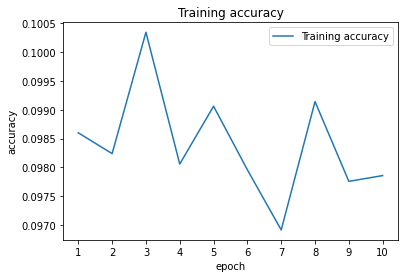

In [15]:
if int(tf.__version__.split('.')[0]) > 1:
    acc_key = 'accuracy'
else:
    acc_key = 'acc'


acc      = history.history[acc_key]
loss     = history.history['loss']
epochs   = range(1,len(acc)+1) 


plt.plot(epochs, acc,  label='Training accuracy')
plt.title('Training accuracy')
plt.xticks(epochs)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend();

In [16]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128 , verbose=2)
print('Accuracy on test dataset:', test_accuracy)

79/79 - 1s - loss: 2.3026 - accuracy: 0.1000
Accuracy on test dataset: 0.10000000149011612


#### **3. Network in network**

In [17]:

model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters=192, kernel_size=5, padding="same", activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters=160, kernel_size=1,padding="same",activation="relu"),
    tf.keras.layers.Conv2D(filters=96, kernel_size=1,padding="same",activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=192, kernel_size=5,padding="same",activation="relu"),
    tf.keras.layers.Conv2D(filters=192, kernel_size=1,padding="same",activation="relu"),
    tf.keras.layers.Conv2D(filters=192, kernel_size=1,padding="same",activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=192, kernel_size=3,padding="same",activation="relu"),


    tf.keras.layers.Flatten(),


    tf.keras.layers.Dense(192,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")

])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 192)       14592     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 160)       30880     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 96)        15456     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 192)       460992    
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 16, 16, 192)       37056     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 16, 16, 192)      

In [18]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer ="adam",
              metrics = ["accuracy"] )


In [19]:
history = model.fit(X_train, y_train, epochs=10,batch_size=128)

Epoch 1/10
391/391 [==============================] - 19s 47ms/step - loss: 1.8336 - accuracy: 0.3243
Epoch 2/10
391/391 [==============================] - 18s 46ms/step - loss: 1.0806 - accuracy: 0.6125
Epoch 3/10
391/391 [==============================] - 18s 46ms/step - loss: 0.8207 - accuracy: 0.7104
Epoch 4/10
391/391 [==============================] - 18s 46ms/step - loss: 0.6353 - accuracy: 0.7757
Epoch 5/10
391/391 [==============================] - 18s 46ms/step - loss: 0.5195 - accuracy: 0.8191
Epoch 6/10
391/391 [==============================] - 18s 46ms/step - loss: 0.3972 - accuracy: 0.8617
Epoch 7/10
391/391 [==============================] - 18s 46ms/step - loss: 0.2912 - accuracy: 0.8973
Epoch 8/10
391/391 [==============================] - 18s 46ms/step - loss: 0.2129 - accuracy: 0.9255
Epoch 9/10
391/391 [==============================] - 18s 46ms/step - loss: 0.1634 - accuracy: 0.9426
Epoch 10/10
391/391 [==============================] - 18s 46ms/step - loss: 0.139

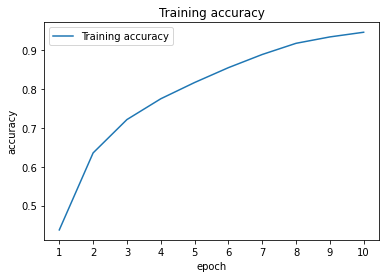

In [20]:
if int(tf.__version__.split('.')[0]) > 1:
    acc_key = 'accuracy'
else:
    acc_key = 'acc'

acc      = history.history[acc_key]
loss     = history.history['loss']
epochs   = range(1,len(acc)+1) # Get number of epochs

plt.plot(epochs, acc,  label='Training accuracy')
plt.title('Training accuracy')
plt.xticks(epochs)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend();

In [21]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128 , verbose=2)
print('Accuracy on test dataset:', test_accuracy)


79/79 - 1s - loss: 1.1575 - accuracy: 0.7451
Accuracy on test dataset: 0.7451000213623047


#### **4. Visualisation Of All The Networks Result**

In [22]:
import pandas as pd
import plotly.express as px


d = {'architecture': ["NiN","Alexnet","VGG-16"], 'Training_Accuracy': [95.7,76.9,86.7], 'Testing_Accuracy': [74.7,76.9,77.1]}
df = pd.DataFrame(data=d)
df

,architecture,Training_Accuracy,Testing_Accuracy
0,NiN,95.7,74.7
1,Alexnet,76.9,76.9
2,VGG-16,86.7,77.1


In [23]:
import plotly.graph_objects as go


fig = go.Figure()
# Create and style traces

fig.add_trace(go.Scatter(x=df['architecture'], y=df['Testing_Accuracy'],
                         line=dict(color='firebrick', width=4, dash='dash')))

# Edit the layout
fig.update_layout(title='TheComparison between the CNN architecture',
                   xaxis_title='CNN Architecture',
                   yaxis_title='Accuracy (%)')


fig.show()

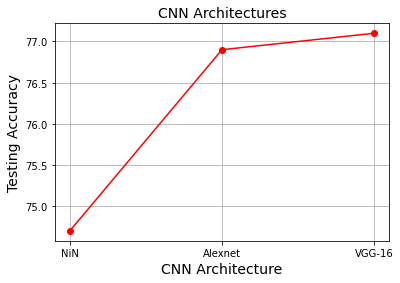

In [24]:
import matplotlib.pyplot as plt
   
Year = df.architecture
Unemployment_Rate = df.Testing_Accuracy
  
plt.plot(Year, Unemployment_Rate, color='red', marker='o')
plt.title('CNN Architectures', fontsize=14)
plt.xlabel('CNN Architecture', fontsize=14)
plt.ylabel('Testing Accuracy', fontsize=14)
plt.grid(True)
plt.show()

In [25]:

fig = px.bar(df, x='architecture', y='Testing_Accuracy',color = "architecture",title="CNN Architectures")
fig.show()

## **Expiriment 2**

### **Activation Function**


#### **1. Activation Function**

In [26]:
model = tf.keras.models.Sequential([
    

    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3,padding="same",activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding="same",activation="relu"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding="same",activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2), 

    tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding="same",activation="relu"),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding="same",activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 8, 8, 128)        

In [27]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer ="adam",
              metrics = ["accuracy"] )

history = model.fit(X_train, y_train, epochs=10,batch_size=128,)

Epoch 1/10
391/391 [==============================] - 5s 11ms/step - loss: 1.6998 - accuracy: 0.3735
Epoch 2/10
391/391 [==============================] - 4s 11ms/step - loss: 0.9583 - accuracy: 0.6611
Epoch 3/10
391/391 [==============================] - 4s 11ms/step - loss: 0.7209 - accuracy: 0.7467
Epoch 4/10
391/391 [==============================] - 4s 11ms/step - loss: 0.5777 - accuracy: 0.7961
Epoch 5/10
391/391 [==============================] - 4s 11ms/step - loss: 0.4580 - accuracy: 0.8400
Epoch 6/10
391/391 [==============================] - 4s 11ms/step - loss: 0.3639 - accuracy: 0.8746
Epoch 7/10
391/391 [==============================] - 4s 11ms/step - loss: 0.2765 - accuracy: 0.9029
Epoch 8/10
391/391 [==============================] - 4s 11ms/step - loss: 0.2135 - accuracy: 0.9252
Epoch 9/10
391/391 [==============================] - 4s 11ms/step - loss: 0.1618 - accuracy: 0.9431
Epoch 10/10
391/391 [==============================] - 4s 11ms/step - loss: 0.1262 - accura

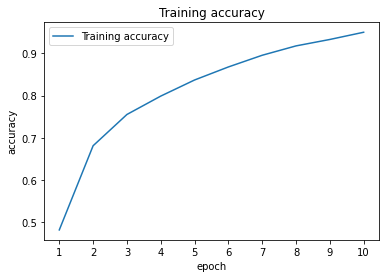

In [28]:

if int(tf.__version__.split('.')[0]) > 1:
    acc_key = 'accuracy'
else:
    acc_key = 'acc'


acc      = history.history[acc_key]
loss     = history.history['loss']
epochs   = range(1,len(acc)+1) # Get number of epochs


plt.plot(epochs, acc,  label='Training accuracy')
plt.title('Training accuracy')
plt.xticks(epochs)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend();

In [29]:


test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128 , verbose=2)
print('Accuracy on test dataset:', test_accuracy)

79/79 - 0s - loss: 0.9451 - accuracy: 0.7764
Accuracy on test dataset: 0.7764000296592712


#### **2. Data Visualisation Activation Function**

In [30]:
import pandas as pd


d = {'Activation_Function': ["Sigmoid","Softplus","Tanh","Selu","Elu","Softsign","Relu"], 'Training_Accuracy': [64.3,92.2,93.3,93.2,95.1,94.0,97.5], 'Testing_Accuracy': [59.9,65.1,72.3,73.6,75.9,76.6,77.4]}


df = pd.DataFrame(data=d)
df.sort_values(by='Testing_Accuracy', ascending=False)
df

,Activation_Function,Training_Accuracy,Testing_Accuracy
0,Sigmoid,64.3,59.9
1,Softplus,92.2,65.1
2,Tanh,93.3,72.3
3,Selu,93.2,73.6
4,Elu,95.1,75.9
5,Softsign,94.0,76.6
6,Relu,97.5,77.4


In [31]:
import plotly.graph_objects as go


fig = go.Figure()
# Create and style traces

fig.add_trace(go.Scatter(x=df['Activation_Function'], y=df['Testing_Accuracy'],
                         line=dict(color='firebrick', width=4, dash='dash')))

# Edit the layout
fig.update_layout(title='Expirimenting Different Activation Functions',
                   xaxis_title='Activation Function',
                   yaxis_title='Testing Accuracy')


fig.show()


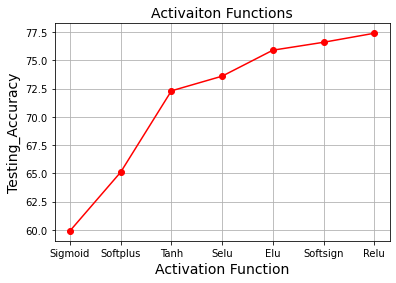

In [32]:


import matplotlib.pyplot as plt
   
Year = df.Activation_Function
Unemployment_Rate = df.Testing_Accuracy
  
plt.plot(Year, Unemployment_Rate, color='red', marker='o')
plt.title('Activaiton Functions', fontsize=14)
plt.xlabel('Activation Function', fontsize=14)
plt.ylabel('Testing_Accuracy', fontsize=14)
plt.grid(True)
plt.show()

## **Expiriments 3**

### **Filter Size**

##### **1. Filter Size Experiment**
Change the filter according 
- 1x1
- 2x2
- 3x3
- 4x4
- 5x5

In [33]:

model = tf.keras.models.Sequential([
    

    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3,padding="same",activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding="same",activation="relu"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding="same",activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2), 

    tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding="same",activation="relu"),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding="same",activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 8, 8, 128)        

In [34]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer ="adam",
              metrics = ["accuracy"] )


history = model.fit(X_train, y_train, epochs=10,batch_size=128)

Epoch 1/10
391/391 [==============================] - 5s 11ms/step - loss: 1.7498 - accuracy: 0.3547
Epoch 2/10
391/391 [==============================] - 4s 11ms/step - loss: 0.9861 - accuracy: 0.6514
Epoch 3/10
391/391 [==============================] - 4s 11ms/step - loss: 0.7413 - accuracy: 0.7421
Epoch 4/10
391/391 [==============================] - 4s 11ms/step - loss: 0.6016 - accuracy: 0.7885
Epoch 5/10
391/391 [==============================] - 4s 11ms/step - loss: 0.4850 - accuracy: 0.8325
Epoch 6/10
391/391 [==============================] - 4s 11ms/step - loss: 0.3884 - accuracy: 0.8650
Epoch 7/10
391/391 [==============================] - 4s 11ms/step - loss: 0.3221 - accuracy: 0.8881
Epoch 8/10
391/391 [==============================] - 4s 11ms/step - loss: 0.2486 - accuracy: 0.9124
Epoch 9/10
391/391 [==============================] - 4s 11ms/step - loss: 0.2008 - accuracy: 0.9287
Epoch 10/10
391/391 [==============================] - 4s 11ms/step - loss: 0.1396 - accura

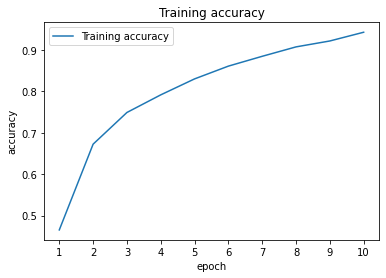

In [35]:
# accuracy values are stored in the dictionary `History.history` 
# the dictonary key to access these accuracy values are:
# "acc" in tensorflow versions <2
# "accuracy" in later versions

# check the current version
if int(tf.__version__.split('.')[0]) > 1:
    acc_key = 'accuracy'
else:
    acc_key = 'acc'

#-----------------------------------------------------------
# Retrieve a list of list results on training and validation data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[acc_key]
loss     = history.history['loss']
epochs   = range(1,len(acc)+1) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc,  label='Training accuracy')
plt.title('Training accuracy')
plt.xticks(epochs)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend();

In [36]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2,monitor='loss')

test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128 , verbose=2, callbacks = [early_stopping])
print('Accuracy on test dataset:', test_accuracy)

79/79 - 0s - loss: 0.8335 - accuracy: 0.7852
Accuracy on test dataset: 0.7851999998092651


#### **2. Visualisation for different filter sizes**

In [37]:
d = {'Filter_size': ["1x1","2x2","4x4","3x3","5x5"], 'Training_Accuracy': [69.3,89.4,94.8,94.7,94.5], 'Test_Accuracy': [61.9,76.2,77.9,76.2,75.8]}


df = pd.DataFrame(data=d)
df.sort_values(by='Test_Accuracy', ascending=False)
df

,Filter_size,Training_Accuracy,Test_Accuracy
0,1x1,69.3,61.9
1,2x2,89.4,76.2
2,4x4,94.8,77.9
3,3x3,94.7,76.2
4,5x5,94.5,75.8


In [38]:


fig = px.bar(df, x='Filter_size', y='Test_Accuracy',color = "Filter_size",title="Expirimenting Different Filter Size")
fig.show()


In [39]:
import plotly.graph_objects as go


fig = go.Figure()
# Create and style traces

fig.add_trace(go.Scatter(x=df['Filter_size'], y=df['Test_Accuracy'],
                         line=dict(color='firebrick', width=4, dash='dash')))

# Edit the layout
fig.update_layout(title='Expirimenting Different Filter Sizes',
                   xaxis_title='Filter Sizes',
                   yaxis_title='Test_Accuracy')


fig.show()

## **Expiriments 4**

### **1. Number of Filter** 
- 32
- 64
- 128

In [40]:

model = tf.keras.models.Sequential([
    

    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3,padding="same",activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding="same",activation="relu"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding="same",activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2), 

    tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding="same",activation="relu"),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding="same",activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 8, 8, 128)        

In [41]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer ="adam",
              metrics = ["accuracy"] )


history = model.fit(X_train, y_train, epochs=10,batch_size=128)

Epoch 1/10
391/391 [==============================] - 5s 11ms/step - loss: 1.7136 - accuracy: 0.3751
Epoch 2/10
391/391 [==============================] - 4s 11ms/step - loss: 1.0107 - accuracy: 0.6431
Epoch 3/10
391/391 [==============================] - 4s 11ms/step - loss: 0.7385 - accuracy: 0.7422
Epoch 4/10
391/391 [==============================] - 4s 11ms/step - loss: 0.5918 - accuracy: 0.7952
Epoch 5/10
391/391 [==============================] - 4s 11ms/step - loss: 0.4685 - accuracy: 0.8385
Epoch 6/10
391/391 [==============================] - 4s 11ms/step - loss: 0.3809 - accuracy: 0.8675
Epoch 7/10
391/391 [==============================] - 4s 11ms/step - loss: 0.2987 - accuracy: 0.8948
Epoch 8/10
391/391 [==============================] - 4s 11ms/step - loss: 0.2256 - accuracy: 0.9223
Epoch 9/10
391/391 [==============================] - 4s 11ms/step - loss: 0.1780 - accuracy: 0.9363
Epoch 10/10
391/391 [==============================] - 4s 11ms/step - loss: 0.1343 - accura

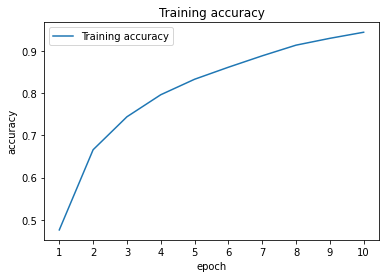

In [42]:
# accuracy values are stored in the dictionary `History.history` 
# the dictonary key to access these accuracy values are:
# "acc" in tensorflow versions <2
# "accuracy" in later versions

# check the current version
if int(tf.__version__.split('.')[0]) > 1:
    acc_key = 'accuracy'
else:
    acc_key = 'acc'

#-----------------------------------------------------------
# Retrieve a list of list results on training and validation data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[acc_key]
loss     = history.history['loss']
epochs   = range(1,len(acc)+1) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc,  label='Training accuracy')
plt.title('Training accuracy')
plt.xticks(epochs)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend();

In [43]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2,monitor='loss')

test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128 , verbose=2, callbacks = [early_stopping])
print('Accuracy on test dataset:', test_accuracy)

79/79 - 0s - loss: 0.8819 - accuracy: 0.7825
Accuracy on test dataset: 0.7825000286102295


## **Expiriment 5**

### **Pooling**

#### **1 Average pooling**

In [44]:

model = tf.keras.models.Sequential([
    

    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3,padding="same",activation="relu"),
    tf.keras.layers.AveragePooling2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding="same",activation="relu"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding="same",activation="relu"),
    tf.keras.layers.AveragePooling2D(pool_size=2), 

    tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding="same",activation="relu"),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding="same",activation="relu"),
    tf.keras.layers.AveragePooling2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
average_pooling2d_1 (Average (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 8, 8, 128)        

In [45]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer ="adam",
              metrics = ["accuracy"] )


history = model.fit(X_train, y_train, epochs=10,batch_size=128)

Epoch 1/10
391/391 [==============================] - 5s 11ms/step - loss: 1.7682 - accuracy: 0.3507
Epoch 2/10
391/391 [==============================] - 4s 11ms/step - loss: 1.0932 - accuracy: 0.6105
Epoch 3/10
391/391 [==============================] - 4s 11ms/step - loss: 0.8757 - accuracy: 0.6923
Epoch 4/10
391/391 [==============================] - 4s 11ms/step - loss: 0.7431 - accuracy: 0.7395
Epoch 5/10
391/391 [==============================] - 4s 11ms/step - loss: 0.6168 - accuracy: 0.7879
Epoch 6/10
391/391 [==============================] - 4s 11ms/step - loss: 0.5295 - accuracy: 0.8163
Epoch 7/10
391/391 [==============================] - 4s 11ms/step - loss: 0.4405 - accuracy: 0.8465
Epoch 8/10
391/391 [==============================] - 4s 11ms/step - loss: 0.3624 - accuracy: 0.8739
Epoch 9/10
391/391 [==============================] - 4s 11ms/step - loss: 0.3066 - accuracy: 0.8936
Epoch 10/10
391/391 [==============================] - 4s 11ms/step - loss: 0.2501 - accura

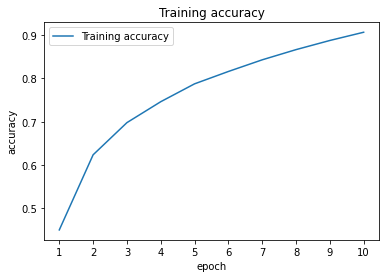

In [46]:
# accuracy values are stored in the dictionary `History.history` 
# the dictonary key to access these accuracy values are:
# "acc" in tensorflow versions <2
# "accuracy" in later versions

# check the current version
if int(tf.__version__.split('.')[0]) > 1:
    acc_key = 'accuracy'
else:
    acc_key = 'acc'

#-----------------------------------------------------------
# Retrieve a list of list results on training and validation data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[acc_key]
loss     = history.history['loss']
epochs   = range(1,len(acc)+1) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc,  label='Training accuracy')
plt.title('Training accuracy')
plt.xticks(epochs)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend();

In [47]:

test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128 , verbose=2)
print('Accuracy on test dataset:', test_accuracy)

79/79 - 0s - loss: 0.7457 - accuracy: 0.7803
Accuracy on test dataset: 0.7803000211715698


#### **2 MaxPooling**





In [48]:
model = tf.keras.models.Sequential([
    

    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3,padding="same",activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding="same",activation="relu"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding="same",activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2), 

    tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding="same",activation="relu"),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding="same",activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 8, 8, 128)        

In [49]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer ="adam",
              metrics = ["accuracy"] )


history = model.fit(X_train, y_train, epochs=10,batch_size=128)

Epoch 1/10
391/391 [==============================] - 5s 11ms/step - loss: 1.6946 - accuracy: 0.3791
Epoch 2/10
391/391 [==============================] - 4s 11ms/step - loss: 0.9688 - accuracy: 0.6568
Epoch 3/10
391/391 [==============================] - 4s 11ms/step - loss: 0.7136 - accuracy: 0.7490
Epoch 4/10
391/391 [==============================] - 4s 11ms/step - loss: 0.5681 - accuracy: 0.8025
Epoch 5/10
391/391 [==============================] - 4s 11ms/step - loss: 0.4475 - accuracy: 0.8461
Epoch 6/10
391/391 [==============================] - 4s 11ms/step - loss: 0.3592 - accuracy: 0.8741
Epoch 7/10
391/391 [==============================] - 4s 11ms/step - loss: 0.2686 - accuracy: 0.9070
Epoch 8/10
391/391 [==============================] - 4s 11ms/step - loss: 0.2134 - accuracy: 0.9262
Epoch 9/10
391/391 [==============================] - 4s 11ms/step - loss: 0.1649 - accuracy: 0.9441
Epoch 10/10
391/391 [==============================] - 4s 11ms/step - loss: 0.1332 - accura

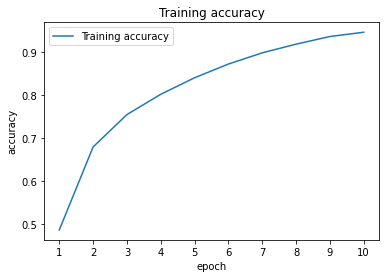

In [50]:
# accuracy values are stored in the dictionary `History.history` 
# the dictonary key to access these accuracy values are:
# "acc" in tensorflow versions <2
# "accuracy" in later versions

# check the current version
if int(tf.__version__.split('.')[0]) > 1:
    acc_key = 'accuracy'
else:
    acc_key = 'acc'

#-----------------------------------------------------------
# Retrieve a list of list results on training and validation data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[acc_key]
loss     = history.history['loss']
epochs   = range(1,len(acc)+1) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc,  label='Training accuracy')
plt.title('Training accuracy')
plt.xticks(epochs)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend();

In [51]:

test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128 , verbose=2)
print('Accuracy on test dataset:', test_accuracy)

79/79 - 0s - loss: 0.9095 - accuracy: 0.7811
Accuracy on test dataset: 0.7810999751091003


#### **3. Visualisation of the pooling layer**

In [52]:
d = {'Pooling': ["AveragePooling","MaxPooling"], 'Train_Accuracy': [91.7,94.5], 'Test_Accuracy': [77.9,78.3]}


df = pd.DataFrame(data=d)
df.sort_values(by='Test_Accuracy', ascending=False)
df



,Pooling,Train_Accuracy,Test_Accuracy
0,AveragePooling,91.7,77.9
1,MaxPooling,94.5,78.3


In [53]:

fig = px.bar(df, x='Pooling', y='Test_Accuracy',color = "Pooling",title="Expirimenting Different Pooling Layer")
fig.show()

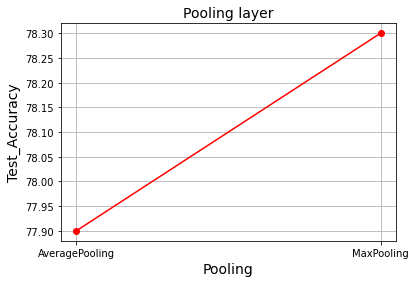

In [54]:



import matplotlib.pyplot as plt
   
Year = df.Pooling
Unemployment_Rate = df.Test_Accuracy
  
plt.plot(Year, Unemployment_Rate, color='red', marker='o')
plt.title('Pooling layer', fontsize=14)
plt.xlabel('Pooling', fontsize=14)
plt.ylabel('Test_Accuracy', fontsize=14)
plt.grid(True)
plt.show()

## **Expiriment 6**

### **Loss Functions**
Need to change accordingly while expiimenting
- Hinge
- Squared_hinge 
- logcosh
- mean_squared_logarithmics_error
- hubber_loss
- sparse_categorical_crossentropy

#### **1. Loss Function**

In [55]:
model = tf.keras.models.Sequential([
    

    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3,padding="same",activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding="same",activation="relu"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding="same",activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2), 

    tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding="same",activation="relu"),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding="same",activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 8, 8, 128)        

#### **2. Hinge**


In [56]:
model.compile(loss = "hinge",
              optimizer ="adam",
              metrics = ["accuracy"] )

history = model.fit(X_train, y_train, epochs=10,batch_size=128)

Epoch 1/10
391/391 [==============================] - 5s 11ms/step - loss: 0.5508 - accuracy: 0.0990
Epoch 2/10
391/391 [==============================] - 4s 11ms/step - loss: 0.5467 - accuracy: 0.0982
Epoch 3/10
391/391 [==============================] - 4s 11ms/step - loss: 0.5493 - accuracy: 0.0985
Epoch 4/10
391/391 [==============================] - 4s 11ms/step - loss: 0.5507 - accuracy: 0.1016
Epoch 5/10
391/391 [==============================] - 4s 11ms/step - loss: 0.5500 - accuracy: 0.0990
Epoch 6/10
391/391 [==============================] - 4s 11ms/step - loss: 0.5494 - accuracy: 0.0999
Epoch 7/10
391/391 [==============================] - 4s 11ms/step - loss: 0.5494 - accuracy: 0.1016
Epoch 8/10
391/391 [==============================] - 4s 11ms/step - loss: 0.5507 - accuracy: 0.1010
Epoch 9/10
391/391 [==============================] - 4s 11ms/step - loss: 0.5489 - accuracy: 0.0991
Epoch 10/10
391/391 [==============================] - 4s 11ms/step - loss: 0.5500 - accura

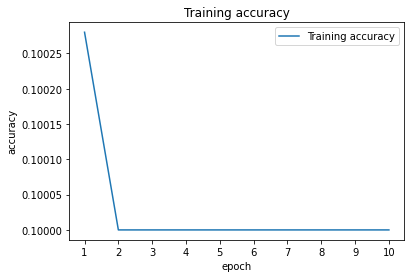

In [57]:
# accuracy values are stored in the dictionary `History.history` 
# the dictonary key to access these accuracy values are:
# "acc" in tensorflow versions <2
# "accuracy" in later versions

# check the current version
if int(tf.__version__.split('.')[0]) > 1:
    acc_key = 'accuracy'
else:
    acc_key = 'acc'

#-----------------------------------------------------------
# Retrieve a list of list results on training and validation data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[acc_key]
loss     = history.history['loss']
epochs   = range(1,len(acc)+1) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc,  label='Training accuracy')
plt.title('Training accuracy')
plt.xticks(epochs)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend();

In [58]:

test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128 , verbose=2)
print('Accuracy on test dataset:', test_accuracy)

79/79 - 0s - loss: 0.5500 - accuracy: 0.1000
Accuracy on test dataset: 0.10000000149011612


#### **3. Squared_hinge**



In [59]:
model.compile(loss = "squared_hinge",
              optimizer ="adam",
              metrics = ["accuracy"] )

history = model.fit(X_train, y_train, epochs=10,batch_size=128)

Epoch 1/10
391/391 [==============================] - 5s 11ms/step - loss: 0.3880 - accuracy: 0.0971
Epoch 2/10
391/391 [==============================] - 4s 11ms/step - loss: 0.3838 - accuracy: 0.1090
Epoch 3/10
391/391 [==============================] - 4s 11ms/step - loss: 0.3857 - accuracy: 0.1016
Epoch 4/10
391/391 [==============================] - 4s 11ms/step - loss: 0.3856 - accuracy: 0.1030
Epoch 5/10
391/391 [==============================] - 4s 11ms/step - loss: 0.3857 - accuracy: 0.0998
Epoch 6/10
391/391 [==============================] - 4s 11ms/step - loss: 0.3820 - accuracy: 0.0990
Epoch 7/10
391/391 [==============================] - 4s 11ms/step - loss: 0.3880 - accuracy: 0.0954
Epoch 8/10
391/391 [==============================] - 4s 11ms/step - loss: 0.3863 - accuracy: 0.1006
Epoch 9/10
391/391 [==============================] - 4s 11ms/step - loss: 0.3843 - accuracy: 0.0990
Epoch 10/10
391/391 [==============================] - 4s 11ms/step - loss: 0.3868 - accura

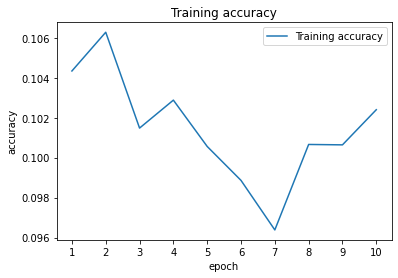

In [60]:
# accuracy values are stored in the dictionary `History.history` 
# the dictonary key to access these accuracy values are:
# "acc" in tensorflow versions <2
# "accuracy" in later versions

# check the current version
if int(tf.__version__.split('.')[0]) > 1:
    acc_key = 'accuracy'
else:
    acc_key = 'acc'

#-----------------------------------------------------------
# Retrieve a list of list results on training and validation data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[acc_key]
loss     = history.history['loss']
epochs   = range(1,len(acc)+1) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc,  label='Training accuracy')
plt.title('Training accuracy')
plt.xticks(epochs)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend();

In [61]:

test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128 , verbose=2)
print('Accuracy on test dataset:', test_accuracy)

79/79 - 0s - loss: 0.3850 - accuracy: 0.0846
Accuracy on test dataset: 0.08460000157356262


#### **3. logcosh**


In [62]:
model.compile(loss = "logcosh",
              optimizer ="adam",
              metrics = ["accuracy"] )

history = model.fit(X_train, y_train, epochs=10,batch_size=128)

Epoch 1/10
391/391 [==============================] - 5s 11ms/step - loss: 3.8096 - accuracy: 0.0999
Epoch 2/10
391/391 [==============================] - 4s 11ms/step - loss: 3.7743 - accuracy: 0.0978
Epoch 3/10
391/391 [==============================] - 4s 11ms/step - loss: 3.7930 - accuracy: 0.0975
Epoch 4/10
391/391 [==============================] - 4s 11ms/step - loss: 3.8170 - accuracy: 0.0991
Epoch 5/10
391/391 [==============================] - 4s 11ms/step - loss: 3.8039 - accuracy: 0.0973
Epoch 6/10
391/391 [==============================] - 4s 11ms/step - loss: 3.8139 - accuracy: 0.0997
Epoch 7/10
391/391 [==============================] - 4s 11ms/step - loss: 3.8123 - accuracy: 0.1006
Epoch 8/10
391/391 [==============================] - 4s 11ms/step - loss: 3.7957 - accuracy: 0.0985
Epoch 9/10
391/391 [==============================] - 4s 11ms/step - loss: 3.8109 - accuracy: 0.0990
Epoch 10/10
391/391 [==============================] - 4s 11ms/step - loss: 3.8051 - accura

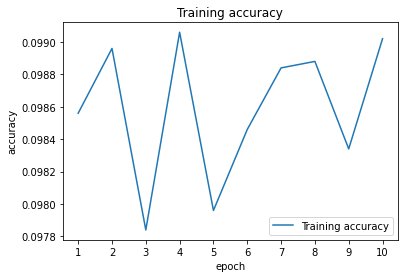

In [63]:
# accuracy values are stored in the dictionary `History.history` 
# the dictonary key to access these accuracy values are:
# "acc" in tensorflow versions <2
# "accuracy" in later versions

# check the current version
if int(tf.__version__.split('.')[0]) > 1:
    acc_key = 'accuracy'
else:
    acc_key = 'acc'

#-----------------------------------------------------------
# Retrieve a list of list results on training and validation data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[acc_key]
loss     = history.history['loss']
epochs   = range(1,len(acc)+1) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc,  label='Training accuracy')
plt.title('Training accuracy')
plt.xticks(epochs)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend();

In [64]:

test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128 , verbose=2)
print('Accuracy on test dataset:', test_accuracy)

79/79 - 0s - loss: 3.8045 - accuracy: 0.1014
Accuracy on test dataset: 0.10140000283718109


#### **4.mean_squared_logarithmics_error**

In [65]:
model.compile(loss = "mean_squared_logarithmic_error",
              optimizer ="adam",
              metrics = ["accuracy"] )

history = model.fit(X_train, y_train, epochs=10,batch_size=128)

Epoch 1/10
391/391 [==============================] - 5s 11ms/step - loss: 2.5061 - accuracy: 0.0998
Epoch 2/10
391/391 [==============================] - 4s 11ms/step - loss: 2.4881 - accuracy: 0.0996
Epoch 3/10
391/391 [==============================] - 4s 11ms/step - loss: 2.4810 - accuracy: 0.0986
Epoch 4/10
391/391 [==============================] - 4s 11ms/step - loss: 2.4887 - accuracy: 0.0982
Epoch 5/10
391/391 [==============================] - 4s 11ms/step - loss: 2.4912 - accuracy: 0.0995
Epoch 6/10
391/391 [==============================] - 4s 11ms/step - loss: 2.4913 - accuracy: 0.0961
Epoch 7/10
391/391 [==============================] - 4s 11ms/step - loss: 2.4921 - accuracy: 0.1012
Epoch 8/10
391/391 [==============================] - 4s 11ms/step - loss: 2.4848 - accuracy: 0.0976
Epoch 9/10
391/391 [==============================] - 4s 11ms/step - loss: 2.4860 - accuracy: 0.0961
Epoch 10/10
391/391 [==============================] - 4s 11ms/step - loss: 2.4842 - accura

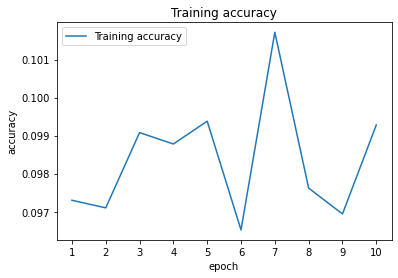

In [66]:
# accuracy values are stored in the dictionary `History.history` 
# the dictonary key to access these accuracy values are:
# "acc" in tensorflow versions <2
# "accuracy" in later versions

# check the current version
if int(tf.__version__.split('.')[0]) > 1:
    acc_key = 'accuracy'
else:
    acc_key = 'acc'

#-----------------------------------------------------------
# Retrieve a list of list results on training and validation data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[acc_key]
loss     = history.history['loss']
epochs   = range(1,len(acc)+1) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc,  label='Training accuracy')
plt.title('Training accuracy')
plt.xticks(epochs)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend();

In [67]:

test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128 , verbose=2)
print('Accuracy on test dataset:', test_accuracy)

79/79 - 0s - loss: 2.4862 - accuracy: 0.1016
Accuracy on test dataset: 0.10159999877214432


#### **5.sparse_categorical_crossentropy**

In [68]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer ="adam",
              metrics = ["accuracy"] )

history = model.fit(X_train, y_train, epochs=10,batch_size=128)

Epoch 1/10
391/391 [==============================] - 5s 11ms/step - loss: 1.8506 - accuracy: 0.3142
Epoch 2/10
391/391 [==============================] - 4s 11ms/step - loss: 1.0670 - accuracy: 0.6212
Epoch 3/10
391/391 [==============================] - 4s 11ms/step - loss: 0.7660 - accuracy: 0.7318
Epoch 4/10
391/391 [==============================] - 4s 11ms/step - loss: 0.6279 - accuracy: 0.7788
Epoch 5/10
391/391 [==============================] - 4s 11ms/step - loss: 0.5116 - accuracy: 0.8240
Epoch 6/10
391/391 [==============================] - 4s 11ms/step - loss: 0.4016 - accuracy: 0.8609
Epoch 7/10
391/391 [==============================] - 4s 11ms/step - loss: 0.3294 - accuracy: 0.8850
Epoch 8/10
391/391 [==============================] - 4s 11ms/step - loss: 0.2618 - accuracy: 0.9089
Epoch 9/10
391/391 [==============================] - 4s 11ms/step - loss: 0.2017 - accuracy: 0.9282
Epoch 10/10
391/391 [==============================] - 4s 11ms/step - loss: 0.1618 - accura

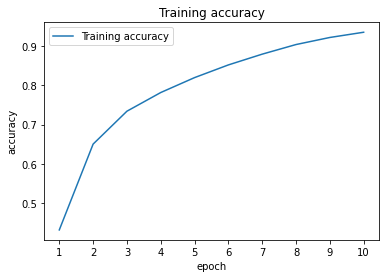

In [69]:
# accuracy values are stored in the dictionary `History.history` 
# the dictonary key to access these accuracy values are:
# "acc" in tensorflow versions <2
# "accuracy" in later versions

# check the current version
if int(tf.__version__.split('.')[0]) > 1:
    acc_key = 'accuracy'
else:
    acc_key = 'acc'

#-----------------------------------------------------------
# Retrieve a list of list results on training and validation data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[acc_key]
loss     = history.history['loss']
epochs   = range(1,len(acc)+1) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc,  label='Training accuracy')
plt.title('Training accuracy')
plt.xticks(epochs)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend();

In [70]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128 , verbose=2)
print('Accuracy on test dataset:', test_accuracy)

79/79 - 0s - loss: 0.9516 - accuracy: 0.7723
Accuracy on test dataset: 0.7723000049591064


## **Expiriment 7**

### Regularisation Method 
**As the model is overfitting i am going to try regularization methods:**

1. L2 regularization
3. Dropout
4. Data augmentation

####  **1. L2Regularisation**

In [71]:
# define the model architecture

model = tf.keras.models.Sequential([
    

    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3],kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3,padding="same",activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPool2D(pool_size=2),



    tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding="same",activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding="same",activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    

    tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding="same",activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding="same",activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPool2D(pool_size=2),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model.summary()



Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 8, 8, 128)        

In [72]:

model.compile(loss = "sparse_categorical_crossentropy",
              optimizer ="adam",
              metrics = ["accuracy"] )

history = model.fit(X_train, y_train, epochs=10,batch_size=128)

Epoch 1/10
391/391 [==============================] - 5s 11ms/step - loss: 2.0055 - accuracy: 0.3388
Epoch 2/10
391/391 [==============================] - 4s 11ms/step - loss: 1.2339 - accuracy: 0.6133
Epoch 3/10
391/391 [==============================] - 4s 11ms/step - loss: 1.0216 - accuracy: 0.6982
Epoch 4/10
391/391 [==============================] - 4s 11ms/step - loss: 0.8709 - accuracy: 0.7525
Epoch 5/10
391/391 [==============================] - 4s 11ms/step - loss: 0.8018 - accuracy: 0.7806
Epoch 6/10
391/391 [==============================] - 4s 11ms/step - loss: 0.7301 - accuracy: 0.8066
Epoch 7/10
391/391 [==============================] - 4s 11ms/step - loss: 0.6948 - accuracy: 0.8217
Epoch 8/10
391/391 [==============================] - 4s 11ms/step - loss: 0.6364 - accuracy: 0.8444
Epoch 9/10
391/391 [==============================] - 4s 11ms/step - loss: 0.5906 - accuracy: 0.8630
Epoch 10/10
391/391 [==============================] - 4s 11ms/step - loss: 0.5717 - accura

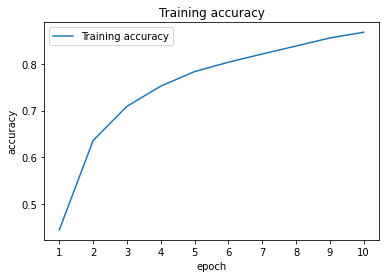

In [73]:
# accuracy values are stored in the dictionary `History.history` 
# the dictonary key to access these accuracy values are:
# "acc" in tensorflow versions <2
# "accuracy" in later versions

# check the current version
if int(tf.__version__.split('.')[0]) > 1:
    acc_key = 'accuracy'
else:
    acc_key = 'acc'

#-----------------------------------------------------------
# Retrieve a list of list results on training and validation data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[acc_key]
loss     = history.history['loss']
epochs   = range(1,len(acc)+1) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc,  label='Training accuracy')
plt.title('Training accuracy')
plt.xticks(epochs)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend();

In [74]:


test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128 , verbose=2)
print('Accuracy on test dataset:', test_accuracy)

79/79 - 0s - loss: 0.8715 - accuracy: 0.7830
Accuracy on test dataset: 0.7829999923706055


#### **2. Drop Out**
- the reason for choosing the numbering is according to the website :
https://towardsdatascience.com/deep-learning-3-more-on-cnns-handling-overfitting-2bd5d99abe5d

In [75]:
# define the model architecture

model = tf.keras.models.Sequential([
    

    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3],kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3,padding="same",activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(rate=0.1),



    tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding="same",activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding="same",activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(rate=0.2),
    

    tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding="same",activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding="same",activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(rate=0.3),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 8, 8, 64)        

In [76]:

model.compile(loss = "sparse_categorical_crossentropy",
              optimizer ="adam",
              metrics = ["accuracy"] )

history = model.fit(X_train, y_train, epochs=10,batch_size=128)

Epoch 1/10
391/391 [==============================] - 5s 12ms/step - loss: 1.9957 - accuracy: 0.3370
Epoch 2/10
391/391 [==============================] - 5s 12ms/step - loss: 1.2976 - accuracy: 0.5832
Epoch 3/10
391/391 [==============================] - 4s 11ms/step - loss: 1.0872 - accuracy: 0.6665
Epoch 4/10
391/391 [==============================] - 5s 12ms/step - loss: 0.9780 - accuracy: 0.7064
Epoch 5/10
391/391 [==============================] - 5s 12ms/step - loss: 0.9050 - accuracy: 0.7350
Epoch 6/10
391/391 [==============================] - 5s 12ms/step - loss: 0.8527 - accuracy: 0.7552
Epoch 7/10
391/391 [==============================] - 4s 11ms/step - loss: 0.8133 - accuracy: 0.7697
Epoch 8/10
391/391 [==============================] - 5s 12ms/step - loss: 0.7709 - accuracy: 0.7858
Epoch 9/10
391/391 [==============================] - 5s 12ms/step - loss: 0.7465 - accuracy: 0.7998
Epoch 10/10
391/391 [==============================] - 5s 12ms/step - loss: 0.7308 - accura

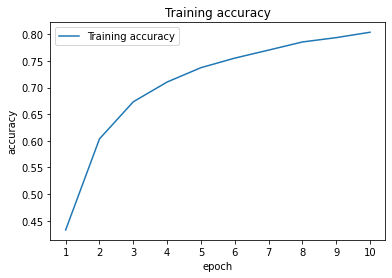

In [77]:
# accuracy values are stored in the dictionary `History.history` 
# the dictonary key to access these accuracy values are:
# "acc" in tensorflow versions <2
# "accuracy" in later versions

# check the current version
if int(tf.__version__.split('.')[0]) > 1:
    acc_key = 'accuracy'
else:
    acc_key = 'acc'

#-----------------------------------------------------------
# Retrieve a list of list results on training and validation data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[acc_key]
loss     = history.history['loss']
epochs   = range(1,len(acc)+1) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc,  label='Training accuracy')
plt.title('Training accuracy')
plt.xticks(epochs)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend();

In [78]:

test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128 , verbose=2)
print('Accuracy on test dataset:', test_accuracy)

79/79 - 0s - loss: 0.8053 - accuracy: 0.7844
Accuracy on test dataset: 0.7843999862670898


#### **3. Data Argumentation**

In [79]:
# define the model architecture

model = tf.keras.models.Sequential([
    

    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3],kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3,padding="same",activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(rate=0.1),



    tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding="same",activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding="same",activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(rate=0.2),
    

    tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding="same",activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding="same",activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(rate=0.3),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_74 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 8, 8, 64)        

In [80]:

model.compile(loss = "sparse_categorical_crossentropy",
              optimizer ="adam",
              metrics = ["accuracy"] )


In [81]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
it_train = datagen.flow(X_train, y_train, batch_size=128)

In [ ]:

history = model.fit(it_train, epochs=10,batch_size=128)


Epoch 1/10
391/391 [==============================] - 23s 58ms/step - loss: 2.1418 - accuracy: 0.2731
Epoch 2/10
391/391 [==============================] - 23s 58ms/step - loss: 1.5616 - accuracy: 0.4650
Epoch 3/10
391/391 [==============================] - 23s 58ms/step - loss: 1.3920 - accuracy: 0.5340
Epoch 4/10
170/391 [============>.................] - ETA: 12s - loss: 1.2867 - accuracy: 0.5829

In [ ]:

if int(tf.__version__.split('.')[0]) > 1:
    acc_key = 'accuracy'
else:
    acc_key = 'acc'

#-----------------------------------------------------------
# Retrieve a list of list results on training and validation data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[acc_key]
loss     = history.history['loss']
epochs   = range(1,len(acc)+1) 
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc,  label='Training accuracy')
plt.title('Training accuracy')
plt.xticks(epochs)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend();


In [ ]:


test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128 , verbose=2)
print('Accuracy on test dataset:', test_accuracy)

## **Expiriment 8**

### **1. Earlier Stopping**

In [ ]:
# define the model architecture

model = tf.keras.models.Sequential([
    

    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3],kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3,padding="same",activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(rate=0.1),



    tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding="same",activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding="same",activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(rate=0.2),
    

    tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding="same",activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding="same",activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(rate=0.3),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model.summary()

In [ ]:
# Compile your model
### Start CODE HERE ### (1 lines of code)
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer ="adam",
              metrics = ["accuracy"] )


from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss')

history = model.fit(X_train, y_train, epochs=10,batch_size=128,callbacks = [early_stopping])


In [ ]:

if int(tf.__version__.split('.')[0]) > 1:
    acc_key = 'accuracy'
else:
    acc_key = 'acc'

#-----------------------------------------------------------
# Retrieve a list of list results on training and validation data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[acc_key]
loss     = history.history['loss']
epochs   = range(1,len(acc)+1) 
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc,  label='Training accuracy')
plt.title('Training accuracy')
plt.xticks(epochs)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend();


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss')

test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128 , verbose=2,callbacks = [early_stopping])
print('Accuracy on test dataset:', test_accuracy)

## **Expiriment 9**

### **Weight Initialisation**

In [ ]:
# define the model architecture

model = tf.keras.models.Sequential([
    

    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3],kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(rate=0.1),



    tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(rate=0.2),
    

    tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(rate=0.3),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model.summary()

In [ ]:
# Compile your model
### Start CODE HERE ### (1 lines of code)
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer ="adam",
              metrics = ["accuracy"] )


from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss')

history = model.fit(X_train, y_train, epochs=10,batch_size=128,callbacks = [early_stopping])


In [ ]:
# accuracy values are stored in the dictionary `History.history` 
# the dictonary key to access these accuracy values are:
# "acc" in tensorflow versions <2
# "accuracy" in later versions

# check the current version
if int(tf.__version__.split('.')[0]) > 1:
    acc_key = 'accuracy'
else:
    acc_key = 'acc'

#-----------------------------------------------------------
# Retrieve a list of list results on training and validation data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[acc_key]
loss     = history.history['loss']
epochs   = range(1,len(acc)+1) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc,  label='Training accuracy')
plt.title('Training accuracy')
plt.xticks(epochs)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend();

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss')

test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128 , verbose=2,callbacks = [early_stopping])
print('Accuracy on test dataset:', test_accuracy)

## **Expiriment 10**

### **Batch Normalisation**
- https://keras.io/api/layers/normalization_layers/batch_normalization/

In [ ]:
# define the model architecture

model = tf.keras.models.Sequential([
    

    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3],kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),



    tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.4),
    

    tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.5),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model.summary()

In [ ]:
# opt = tf.keras.optimizers.Adam(learning_rate=0.001)
# opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer ="adam",
              metrics = ["accuracy"] )
### End CODE HERE ###

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = tf.keras.callbacks.EarlyStopping(patience=2,monitor='loss')

history = model.fit(X_train, y_train, epochs=10,batch_size=128,callbacks = [early_stopping])

In [ ]:
# accuracy values are stored in the dictionary `History.history` 
# the dictonary key to access these accuracy values are:
# "acc" in tensorflow versions <2
# "accuracy" in later versions

# check the current version
if int(tf.__version__.split('.')[0]) > 1:
    acc_key = 'accuracy'
else:
    acc_key = 'acc'

#-----------------------------------------------------------
# Retrieve a list of list results on training and validation data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[acc_key]
loss     = history.history['loss']
epochs   = range(1,len(acc)+1) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc,  label='Training accuracy')
plt.title('Training accuracy')
plt.xticks(epochs)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend();

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2,monitor='loss')

test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128 , verbose=2, callbacks = [early_stopping])
print('Accuracy on test dataset:', test_accuracy)

## **Expiriment 11**

### **Gradient Descent**
- Batch gradient descent
- Mini-batch gradient descent
- https://towardsdatascience.com/hyper-parameter-tuning-techniques-in-deep-learning-4dad592c63c8

#### **1. Batch gradient descent**

In [ ]:

model = tf.keras.models.Sequential([
    

    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3],kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),



    tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.4),
    

    tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.5),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model.summary()

In [ ]:

model.compile(loss = "sparse_categorical_crossentropy",
              optimizer ="adam",
              metrics = ["accuracy"] )
### End CODE HERE ###

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss')

history = model.fit(X_train, y_train, epochs=10,callbacks = [early_stopping])

In [ ]:
# accuracy values are stored in the dictionary `History.history` 
# the dictonary key to access these accuracy values are:
# "acc" in tensorflow versions <2
# "accuracy" in later versions

# check the current version
if int(tf.__version__.split('.')[0]) > 1:
    acc_key = 'accuracy'
else:
    acc_key = 'acc'

#-----------------------------------------------------------
# Retrieve a list of list results on training and validation data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[acc_key]
loss     = history.history['loss']
epochs   = range(1,len(acc)+1) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc,  label='Training accuracy')
plt.title('Training accuracy')
plt.xticks(epochs)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend();

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2,monitor='loss')

test_loss, test_accuracy = model.evaluate(X_test, y_test,verbose=2, callbacks = [early_stopping])
print('Accuracy on test dataset:', test_accuracy)

#### **2. Mini-batch gradient descent**

In [ ]:
# define the model architecture

model = tf.keras.models.Sequential([
    

    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3],kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),



    tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.4),
    

    tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.5),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model.summary()

In [ ]:
# opt = tf.keras.optimizers.Adam(learning_rate=0.001)
# opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer ="adam",
              metrics = ["accuracy"] )
### End CODE HERE ###

In [ ]:

from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss')

history = model.fit(X_train, y_train, epochs=10,batch_size=128,callbacks = [early_stopping])

In [ ]:
# accuracy values are stored in the dictionary `History.history` 
# the dictonary key to access these accuracy values are:
# "acc" in tensorflow versions <2
# "accuracy" in later versions

# check the current version
if int(tf.__version__.split('.')[0]) > 1:
    acc_key = 'accuracy'
else:
    acc_key = 'acc'

#-----------------------------------------------------------
# Retrieve a list of list results on training and validation data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[acc_key]
loss     = history.history['loss']
epochs   = range(1,len(acc)+1) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc,  label='Training accuracy')
plt.title('Training accuracy')
plt.xticks(epochs)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend();

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss')

test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128 , verbose=2, callbacks = [early_stopping])
print('Accuracy on test dataset:', test_accuracy)

---

## **Expiriment 12**

### **Optimization Algorithms** 

Teaking its learning rate and other parameters

Keras Link:- https://keras.io/api/optimizers/

- SGD
- RMSprop
- Adam
- Adadelta
- Adagrad
- Adamax

#### **1. SDG**

In [ ]:
model = tf.keras.models.Sequential([
    

    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3],kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),



    tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.4),
    

    tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.5),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model.summary()

In [ ]:
# SDG Without Parameter tuned 
# opt  = tf.keras.optimizers.SGD( )


# SDG With Parameter tuned 


# opt  = tf.keras.optimizers.SGD( learning_rate = 0.01)

opt  = tf.keras.optimizers.SGD( learning_rate = 0.001)

# opt  = tf.keras.optimizers.SGD( learning_rate = 0.0001)


# opt  = tf.keras.optimizers.SGD( learning_rate=0.01, momentum= 0.2)


# opt  = tf.keras.optimizers.SGD( learning_rate=0.01, momentum= 0.6)


# opt  = tf.keras.optimizers.SGD( learning_rate=0.01, momentum= 0.9)


model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = opt,
              metrics = ["accuracy"] )
### End CODE HERE ###

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss')

history = model.fit(X_train, y_train, epochs=10,batch_size=128,callbacks = [early_stopping])

In [ ]:
# accuracy values are stored in the dictionary `History.history` 
# the dictonary key to access these accuracy values are:
# "acc" in tensorflow versions <2
# "accuracy" in later versions

# check the current version
if int(tf.__version__.split('.')[0]) > 1:
    acc_key = 'accuracy'
else:
    acc_key = 'acc'

#-----------------------------------------------------------
# Retrieve a list of list results on training and validation data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[acc_key]
loss     = history.history['loss']
epochs   = range(1,len(acc)+1) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc,  label='Training accuracy')
plt.title('Training accuracy')
plt.xticks(epochs)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend();

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss')

test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128 , verbose=2, callbacks = [early_stopping])
print('Accuracy on test dataset:', test_accuracy)

#### **2. RMSprop**

In [ ]:
model = tf.keras.models.Sequential([
    

    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3],kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),



    tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.4),
    

    tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.5),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model.summary()

In [ ]:
# #Normal RMSPROP 
# opt  = tf.keras.optimizers.RMSprop()

# #Parameters tunings expiriment
# opt  = tf.keras.optimizers.RMSprop(learning_rate=0.01)

# opt  = tf.keras.optimizers.RMSprop(learning_rate=0.001)

# opt  = tf.keras.optimizers.RMSprop(learning_rate=0.0001)

opt  = tf.keras.optimizers.RMSprop(learning_rate=0.001, momentum=0.2)

# opt  = tf.keras.optimizers.RMSprop(learning_rate=0.001, momentum=0.6)

# opt  = tf.keras.optimizers.RMSprop(learning_rate=0.001, momentum=0.9)

model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = opt,
              metrics = ["accuracy"] )
### End CODE HERE ###

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss')

history = model.fit(X_train, y_train, epochs=10,batch_size=128,callbacks = [early_stopping])

In [ ]:
# accuracy values are stored in the dictionary `History.history` 
# the dictonary key to access these accuracy values are:
# "acc" in tensorflow versions <2
# "accuracy" in later versions

# check the current version
if int(tf.__version__.split('.')[0]) > 1:
    acc_key = 'accuracy'
else:
    acc_key = 'acc'

#-----------------------------------------------------------
# Retrieve a list of list results on training and validation data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[acc_key]
loss     = history.history['loss']
epochs   = range(1,len(acc)+1) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc,  label='Training accuracy')
plt.title('Training accuracy')
plt.xticks(epochs)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend();

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss')

test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128 , verbose=2, callbacks = [early_stopping])
print('Accuracy on test dataset:', test_accuracy)

#### **3. Adam**

In [ ]:
model = tf.keras.models.Sequential([
    

    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3],kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),



    tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.4),
    

    tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.5),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model.summary()

In [ ]:
# #Normal Adam 
# opt  = tf.keras.optimizers.Adam()

# #Parameters tunings expiriment
# opt  = tf.keras.optimizers.Adam(learning_rate=0.01)

# opt  = tf.keras.optimizers.Adam(learning_rate=0.001)

# opt  = tf.keras.optimizers.Adam(learning_rate=0.0001)

opt  = tf.keras.optimizers.Adam(learning_rate=0.001, epsilon=0.001)

# opt  = tf.keras.optimizers.Adam(learning_rate=0.001, epsilon=0.01)

# opt  = tf.keras.optimizers.Adam(learning_rate=0.001, epsilon=0.0001)

model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = opt,
              metrics = ["accuracy"] )
### End CODE HERE ###

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss')

history = model.fit(X_train, y_train, epochs=10,batch_size=128,callbacks = [early_stopping])

In [ ]:
# accuracy values are stored in the dictionary `History.history` 
# the dictonary key to access these accuracy values are:
# "acc" in tensorflow versions <2
# "accuracy" in later versions

# check the current version
if int(tf.__version__.split('.')[0]) > 1:
    acc_key = 'accuracy'
else:
    acc_key = 'acc'

#-----------------------------------------------------------
# Retrieve a list of list results on training and validation data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[acc_key]
loss     = history.history['loss']
epochs   = range(1,len(acc)+1) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc,  label='Training accuracy')
plt.title('Training accuracy')
plt.xticks(epochs)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend();

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss')

test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128 , verbose=2, callbacks = [early_stopping])
print('Accuracy on test dataset:', test_accuracy)

#### **4. Adadelta**

In [ ]:
model = tf.keras.models.Sequential([
    

    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3],kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),



    tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.4),
    

    tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.5),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model.summary()

In [ ]:
# #Normal Adadelta 
# opt  = tf.keras.optimizers.Adadelta()

# #Parameters tunings expiriment
# opt  = tf.keras.optimizers.Adadelta(learning_rate=0.01)

# opt  = tf.keras.optimizers.Adadelta(learning_rate=0.001)

# opt  = tf.keras.optimizers.Adadelta(learning_rate=0.0001)

# opt  = tf.keras.optimizers.Adadelta(learning_rate=0.01, epsilon=0.01)

# opt  = tf.keras.optimizers.Adadelta(learning_rate=0.01, epsilon=0.001)

opt  = tf.keras.optimizers.Adadelta(learning_rate=0.01, epsilon=0.0001)

model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = opt,
              metrics = ["accuracy"] )
### End CODE HERE ###

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss')

history = model.fit(X_train, y_train, epochs=10,batch_size=128,callbacks = [early_stopping])

In [ ]:
# accuracy values are stored in the dictionary `History.history` 
# the dictonary key to access these accuracy values are:
# "acc" in tensorflow versions <2
# "accuracy" in later versions

# check the current version
if int(tf.__version__.split('.')[0]) > 1:
    acc_key = 'accuracy'
else:
    acc_key = 'acc'

#-----------------------------------------------------------
# Retrieve a list of list results on training and validation data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[acc_key]
loss     = history.history['loss']
epochs   = range(1,len(acc)+1) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc,  label='Training accuracy')
plt.title('Training accuracy')
plt.xticks(epochs)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend();

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss')

test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128 , verbose=2, callbacks = [early_stopping])
print('Accuracy on test dataset:', test_accuracy)

#### **5. Adamax**


In [ ]:
model = tf.keras.models.Sequential([
    

    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3],kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),



    tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.4),
    

    tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.5),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model.summary()

In [ ]:
# #Normal Adagrad 
# opt  = tf.keras.optimizers.Adamax()

# #Parameters tunings expiriment
# opt  = tf.keras.optimizers.Adamax(learning_rate=0.01)

# opt  = tf.keras.optimizers.Adamax(learning_rate=0.001)

# opt  = tf.keras.optimizers.Adamax(learning_rate=0.0001)

# opt  = tf.keras.optimizers.Adamax(learning_rate=0.001, epsilon=0.01)

opt  = tf.keras.optimizers.Adamax(learning_rate=0.001, epsilon=0.001)

# opt  = tf.keras.optimizers.Adamax(learning_rate=0.001, epsilon=0.0001)

model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = opt,
              metrics = ["accuracy"] )
### End CODE HERE ###

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss')

history = model.fit(X_train, y_train, epochs=10,batch_size=128,callbacks = [early_stopping])

In [ ]:
# accuracy values are stored in the dictionary `History.history` 
# the dictonary key to access these accuracy values are:
# "acc" in tensorflow versions <2
# "accuracy" in later versions

# check the current version
if int(tf.__version__.split('.')[0]) > 1:
    acc_key = 'accuracy'
else:
    acc_key = 'acc'

#-----------------------------------------------------------
# Retrieve a list of list results on training and validation data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[acc_key]
loss     = history.history['loss']
epochs   = range(1,len(acc)+1) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc,  label='Training accuracy')
plt.title('Training accuracy')
plt.xticks(epochs)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend();

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss')

test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128 , verbose=2, callbacks = [early_stopping])
print('Accuracy on test dataset:', test_accuracy)

#### **6. Visualisation**


In [ ]:
 d = {'optimizer': ["SDG","RMSProp","Adam","Adedelta","Adamax"], 'Train_Accuracy': [43.5,80.1,80.8,65.3,77.7], 'Test_Accuracy': [44.2,79.6,80.8,64.8,77.5]}


df = pd.DataFrame(data=d)
df.sort_values(by='Test_Accuracy', ascending=False)
df



In [ ]:
fig = px.bar(df, x='optimizer', y='Test_Accuracy',color = "optimizer",title="Expirimenting Different optimizer")
fig.show()


## **Converting to PDF**

In [ ]:
stop

In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

!jupyter nbconvert --to PDF "Assessment.ipynb"
